PDF Copy

file:///Users/bhvshrikant/Downloads/bhv-shrikant-clustering.pdf

#About Dataset

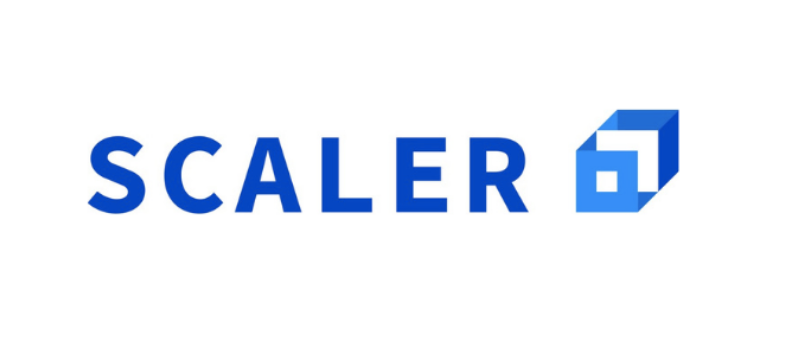

---
Scaler is an online tech-versity offering intensive computer science & Data Science courses through live classes delivered by tech leaders and subject matter experts. The meticulously structured program enhances the skills of software professionals by offering a modern curriculum with exposure to the latest technologies. It is a product by InterviewBit.

---

Feature Profiling:

---
1. Unnamed 0: The index of the dataset.

2. Email_hash: An anonymized identifier representing the email of the learner.

3. Company_hash: An anonymized identifier indicating the current employer of the learner.

4. orgyear: Represents the year the learner began employment at the current
company.

5. CTC: Current Compensation to the Company (CTC) of the learner.

6. Job_position: Represents the job profile or role of the learner within their company.

7. CTC_updated_year: The year in which the learner's CTC was most recently
updated. This could be due to yearly increments, promotions, or other factors.

---

Problem Statement:

---
Profiling of the best companies and job positions to work for from the Scaler database. Cluster the given segment of learners on the basis of their job profile, company, and other features. Ideally, these clusters should have similar characteristics.

---

#Load Dataset

In [ ]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!gdown '1EUu7kibDcWGXcB0uvHFZHhfzTGJz4ywz'

Downloading...
From: https://drive.google.com/uc?id=1EUu7kibDcWGXcB0uvHFZHhfzTGJz4ywz
To: /content/scaler_clustering.csv
100% 24.7M/24.7M [00:00<00:00, 98.4MB/s]


In [ ]:
data = pd.read_csv('scaler_clustering.csv')
df = pd.DataFrame(data)
df.head(3)

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0


In [ ]:
print(f'Number of rows : {df.shape[0]}\nNumber of columns : {df.shape[1]}')

Number of rows : 205843
Number of columns : 7


#EDA

##<font size='5'>Description of dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205843 entries, 0 to 205842
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        205843 non-null  int64  
 1   company_hash      205799 non-null  object 
 2   email_hash        205843 non-null  object 
 3   orgyear           205757 non-null  float64
 4   ctc               205843 non-null  int64  
 5   job_position      153279 non-null  object 
 6   ctc_updated_year  205843 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 11.0+ MB


In [ ]:
for i in df.columns:
  print(f'Number of unique entries in {i} = {df[i].nunique()}')

Number of unique entries in Unnamed: 0 = 205843
Number of unique entries in company_hash = 37299
Number of unique entries in email_hash = 153443
Number of unique entries in orgyear = 77
Number of unique entries in ctc = 3360
Number of unique entries in job_position = 1016
Number of unique entries in ctc_updated_year = 7


In [ ]:
np.round(df.describe(),3)

,Unnamed: 0,orgyear,ctc,ctc_updated_year
count,205843.000,205757.000,2.058430e+05,205843.000
mean,103273.942,2014.883,2.271685e+06,2019.628
std,59741.306,63.571,1.180091e+07,1.325
min,0.000,0.000,2.000000e+00,2015.000
25%,51518.500,2013.000,5.300000e+05,2019.000
50%,103151.000,2016.000,9.500000e+05,2020.000
75%,154992.500,2018.000,1.700000e+06,2021.000
max,206922.000,20165.000,1.000150e+09,2021.000


In [ ]:
np.round(df.isna().sum()/len(df) * 100,2)

Unnamed: 0           0.00
company_hash         0.02
email_hash           0.00
orgyear              0.04
ctc                  0.00
job_position        25.54
ctc_updated_year     0.00
dtype: float64

'company_hash', 'orgyear', have .02% 0.04% missing values respectively.
Also, 'job_position' has over 25% missing values.

We'll have to impute the data.

##Univariate And Bivariate Analysis

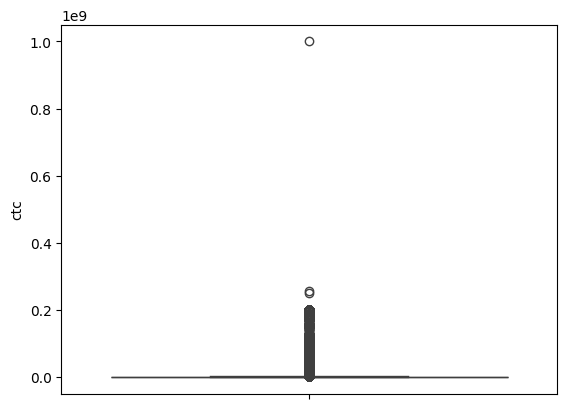

In [ ]:
sns.boxplot(df['ctc'])
plt.show()

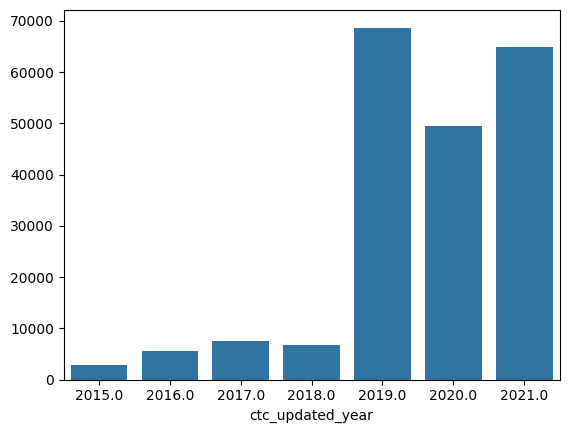

In [ ]:
sns.barplot(df.groupby('ctc_updated_year').size())
plt.show()

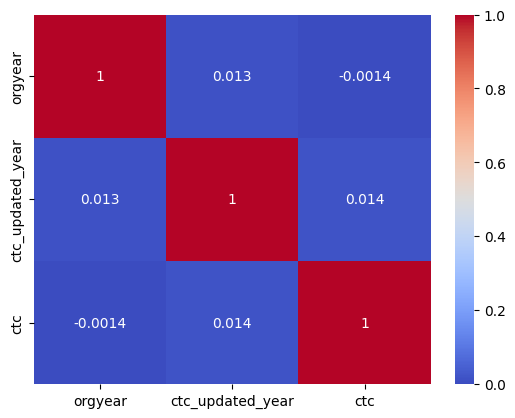

In [ ]:
sns.heatmap(df[['orgyear','ctc_updated_year','ctc']].corr(), cmap='coolwarm', annot=True)
plt.show()

* 'orgyear' and 'ctc' are negatively correlated.
* 'ctc' and 'ctc_updated_year' shows weak or no correlation.

Upper Whisker CTC:  3455000
Lower Whisker CTC: -1225000
Median CTC:  950000


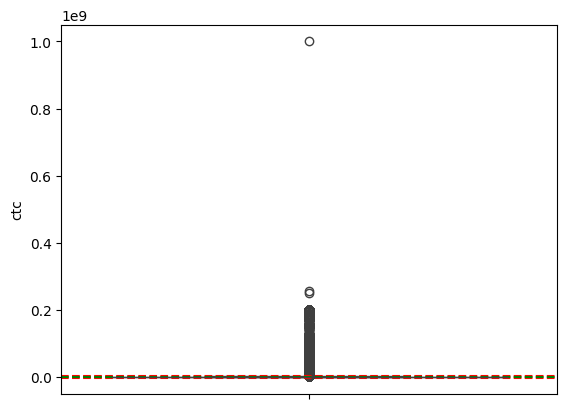

In [ ]:
ctc_values = df['ctc']

Q1, Q3 =  ctc_values.quantile(0.25), ctc_values.quantile(0.75)

IQR = Q3 - Q1

upper_bound = Q3 +1.5*IQR

lower_bound = Q1 - 1.5 * IQR

# Calaculate median
median = ctc_values.median()

print(f"Upper Whisker CTC: {upper_bound: .0f}")
print(f"Lower Whisker CTC: {lower_bound: .0f}")
print(f"Median CTC: {median: .0f}")

sns.boxplot(df['ctc'])
plt.axhline(y=upper_bound, color='r', linestyle='--')
plt.axhline(y=lower_bound, color='r', linestyle='--')
plt.axhline(y=median, color='g', linestyle='--')
plt.show()

* Median CTC of the learners is 9.5 LPA, with the upper bound being at 34.5 LPA.

##<font size='5'>Checking Duplicacy

In [ ]:
df.head(3)

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0


In [ ]:
print(f'Number of duplicate data points: {len(df.loc[df.duplicated()])}')

Number of duplicate data points: 0


##<font size='5'>Checking duplicated PII ids in column email_hash

In [ ]:
df['email_hash'].value_counts().head(10)

email_hash
bbace3cc586400bbc65765bc6a16b77d8913836cfc98b77c05488f02f5714a4b    10
6842660273f70e9aa239026ba33bfe82275d6ab0d20124021b952b5bc3d07e6c     9
298528ce3160cc761e4dc37a07337ee2e0589df251d73645aae209b010210eee     9
3e5e49daa5527a6d5a33599b238bf9bf31e85b9efa9a94f1c88c5e15a6f31378     9
b4d5afa09bec8689017d8b29701b80d664ca37b83cb883376b2e95191320da66     8
faf40195f8c58d5c7edc758cc725a762d51920da996410b80ac4a4d85c803da0     8
4818edfd67ed8563dde5d083306485d91d19f4f1c95d193a1700e79dd245b75c     8
c0eb129061675da412b0deb15871dd06ef0d7cd86eb5f7e8cc6a20b0d1938183     8
d598d6f1fb21b45593c2afc1c2f76ae9f4cb7167156cdf93246d4192a89d8065     8
d15041f58bb01c8ee29f72e33b136e26bc32f3169a40b53d75fe7ae9cbb9a551     8
Name: count, dtype: int64

* For a learner, there has to be unique 'email_hash'.

* Having so many rows for 1 email_hash doesn't make sense.

* May be, because of the changed 'job_position' or 'ctc_updated_year'.

* It's better to have only 1 row for each 'email_hash' containing the most recent information.

In [ ]:
df = df.groupby('email_hash').aggregate({'company_hash':'first','orgyear':'first','ctc':'last','job_position':'last', 'ctc_updated_year':'last'}).reset_index()
df.head(3)

,email_hash,company_hash,orgyear,ctc,job_position,ctc_updated_year
0,00003288036a44374976948c327f246fdbdf0778546904...,bxwqgogen,2012.0,3500000,Backend Engineer,2019.0
1,0000aaa0e6b61f7636af1954b43d294484cd151c9b3cf6...,nqsn axsxnvr,2013.0,250000,Backend Engineer,2020.0
2,0000d58fbc18012bf6fa2605a7b0357d126ee69bc41032...,gunhb,2021.0,1300000,FullStack Engineer,2019.0


Notice, there are few rows in which 'ctc_updated_year' is older than 'orgyear'.

We'll inspect this.

#Feature Engineering

In [ ]:
np.round(df.isna().sum()/len(df) * 100,2)

email_hash           0.00
company_hash         0.02
orgyear              0.05
ctc                  0.00
job_position        13.18
ctc_updated_year     0.00
dtype: float64

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df[['orgyear']] = imputer.fit_transform(df[['orgyear']])
np.round(df.isna().sum()/len(df) * 100,2)

email_hash           0.00
company_hash         0.02
orgyear              0.00
ctc                  0.00
job_position        13.18
ctc_updated_year     0.00
dtype: float64

In [ ]:
df['ctc_updated_year'] = df['ctc_updated_year'].astype('int64')
df['ctc'] = df['ctc'].astype('int64')
df['orgyear'] = df['orgyear'].astype('int64')

df['Years of Experience'] = df['ctc_updated_year'] - df['orgyear']
df.head(3)

,email_hash,company_hash,orgyear,ctc,job_position,ctc_updated_year,Years of Experience
0,00003288036a44374976948c327f246fdbdf0778546904...,bxwqgogen,2012,3500000,Backend Engineer,2019,7
1,0000aaa0e6b61f7636af1954b43d294484cd151c9b3cf6...,nqsn axsxnvr,2013,250000,Backend Engineer,2020,7
2,0000d58fbc18012bf6fa2605a7b0357d126ee69bc41032...,gunhb,2021,1300000,FullStack Engineer,2019,-2


###Inspecting the cause of negative values in 'Years of Experience'

In [ ]:
df.loc[df['Years of Experience']<0]

,email_hash,company_hash,orgyear,ctc,job_position,ctc_updated_year,Years of Experience
2,0000d58fbc18012bf6fa2605a7b0357d126ee69bc41032...,gunhb,2021,1300000,FullStack Engineer,2019,-2
26,000dbb08ff8c14f7c6d4729e0d9015c48cc57c6de27cf2...,bxwqgogen qa xzaxv uqxcvnt rna,2016,1650000,None,2015,-1
45,0011de50390ba4a97b397299563fcaddc566721bb6b76a...,onvqnhu,2021,600000,None,2020,-1
46,0011e65b6e10124592d9ecfae362d16ae8587309947d12...,bgmonvw,2018,1100000,Backend Engineer,2016,-2
51,00149de9bcbf2423568b9c6b6fabdf6c97a5ca346d6674...,nyt a t oyvf sqghu,2018,2100000,Backend Engineer,2017,-1
...,...,...,...,...,...,...,...
153326,ffc7b3c4381194b6c405cd469f0862be6d209518d50228...,eqtoytq,2018,300000,Other,2017,-1
153341,ffcf5925a8dc00fe70d297b563a0e55623c06b97552c0d...,vouxqt ojontbo,2021,540000,Backend Engineer,2020,-1
153376,ffdff697bf764afd630b47586f36c67bc8bed7a14b20a5...,fgqptd,2016,1000000,FullStack Engineer,2015,-1
153384,ffe39c3314bdfdcd49d0bcdcd6b5e056b2233266eb36ac...,sqvahvnt onhatzn,2023,1200000,FullStack Engineer,2021,-2


In [ ]:
df['ctc_updated_year'].sort_values(ascending=False)

153442    2021
133704    2021
133713    2021
32611     2021
70312     2021
          ... 
130095    2015
64087     2015
138935    2015
97500     2015
39832     2015
Name: ctc_updated_year, Length: 153443, dtype: int64

The latest year in this column is 2021

In [ ]:
df['orgyear'].sort_values(ascending=False)

38406     20165
67986     20165
72721      2204
100986     2107
26920      2106
          ...  
36737         0
66142         0
68893         0
49823         0
6402          0
Name: orgyear, Length: 153443, dtype: int64

In [ ]:
df.loc[df['orgyear']>2021]

,email_hash,company_hash,orgyear,ctc,job_position,ctc_updated_year,Years of Experience
99,002a66aed0db06ebb44bd9b368df9ada2002b52ace843c...,zgn vuurxwvmrt,2022,10000,None,2021,-1
263,0079138b0f58d4b8cbcecfec7061042d18348317dac388...,nvnv bgngqo,2023,700000,Research Engineers,2020,-3
368,00a6f90fa70503ed3786ed70b8e8cda65ba9cd62eec660...,s uhrrvxvy wgrrtst ge tzsxzttqxzs vza ntwyzgrgsj,2022,1600000,Backend Engineer,2020,-2
422,00baca51e3bce21e6a4b1d486f12808af1fe1d707a4cc8...,bur,2022,1700000,FullStack Engineer,2020,-2
455,00c9d98cdc282e1bb4a4a25188609dfa43a7cc0c06dbc2...,vuunxg,2023,1300000,Software Development Engineer - I,2021,-2
...,...,...,...,...,...,...,...
153054,ff4f30af9c7ce03f50cf7f47ec3c3520b46d4bbc9c362e...,vax ogenfvqt wgbuvzj,2022,570000,None,2020,-2
153062,ff5252f4535d08fab7b920bc0d529231a8b05225bfe175...,vbvkgz,2023,8300000,FullStack Engineer,2020,-3
153167,ff7f41514a8263fc4279245b9099925715744e2be76c25...,zgn vuurxwvmrt vwwghzn,2022,600000,Other,2021,-1
153292,ffb84149da483a62d4a1ba22ae2f1a4cb842ef049995c0...,zgn vuurxwvmrt vwwghzn,2022,50000,Other,2021,-1


There are over 1050 rows where 'orgyear' is even greater than 2021 which isn't possible.

Let's drop them.

In [ ]:
df=df.loc[df['orgyear']<=2021]
df.head(3)

,email_hash,company_hash,orgyear,ctc,job_position,ctc_updated_year,Years of Experience
0,00003288036a44374976948c327f246fdbdf0778546904...,bxwqgogen,2012,3500000,Backend Engineer,2019,7
1,0000aaa0e6b61f7636af1954b43d294484cd151c9b3cf6...,nqsn axsxnvr,2013,250000,Backend Engineer,2020,7
2,0000d58fbc18012bf6fa2605a7b0357d126ee69bc41032...,gunhb,2021,1300000,FullStack Engineer,2019,-2


#Manual Clustering

## Outliers in CTC

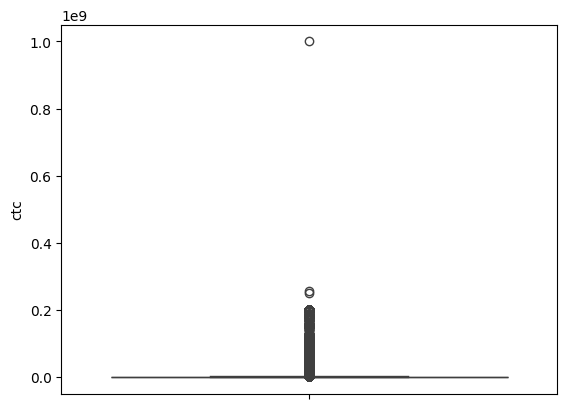

In [ ]:
sns.boxplot(df['ctc'])
plt.show()

In [ ]:
dftmp = df.copy()
print(f'Number of rows before outlier removal: {dftmp.shape[0]}')
cols = ['ctc']

Q1 = dftmp[cols].quantile(0.25)
Q3 = dftmp[cols].quantile(0.75)
IQR = Q3 - Q1

dftmp = dftmp[~((dftmp[cols] < (Q1 - 1.5 * IQR)) |(dftmp[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
print(f'Number of rows after outlier removal: {dftmp.shape[0]}')

Number of rows before outlier removal: 152392
Number of rows after outlier removal: 142083


##Manual Clustering

In [ ]:
#Manual Clustering based on 'company_hash', 'job_position', and 'orgyear'
dftmp['Cluster'] = dftmp.groupby(['company_hash', 'job_position', 'orgyear']).ngroup()
dftmp.head(3)

,email_hash,company_hash,orgyear,ctc,job_position,ctc_updated_year,Years of Experience,Cluster
1,0000aaa0e6b61f7636af1954b43d294484cd151c9b3cf6...,nqsn axsxnvr,2013,250000,Backend Engineer,2020,7,26259.0
2,0000d58fbc18012bf6fa2605a7b0357d126ee69bc41032...,gunhb,2021,1300000,FullStack Engineer,2019,-2,16680.0
3,000120d0c8aa304fcf12ab4b85e21feb80a342cfea03d4...,bxwqgotbx wgqugqvnxgz,2004,2000000,FullStack Engineer,2021,17,7902.0


In [ ]:
#Five-point summary of CTC
summary = dftmp.groupby(['company_hash', 'job_position', 'orgyear'])['ctc'].agg(['mean', 'median', 'max', 'min', 'count']).reset_index()
summary.columns = ['company_hash', 'job_position', 'orgyear', 'ctc_mean', 'ctc_median', 'ctc_max', 'ctc_min', 'ctc_count']
summary.head(3)

,company_hash,job_position,orgyear,ctc_mean,ctc_median,ctc_max,ctc_min,ctc_count
0,0,Other,2020,100000.0,100000.0,100000,100000,1
1,0000,Other,2017,300000.0,300000.0,300000,300000,1
2,01 ojztqsj,Android Engineer,2016,270000.0,270000.0,270000,270000,1


In [ ]:
#Merge the summary statistics with the original dataset
dftmp = pd.merge(dftmp, summary, on=['company_hash', 'job_position', 'orgyear'], how='left')
dftmp.head(3)

,email_hash,company_hash,orgyear,ctc,job_position,ctc_updated_year,Years of Experience,Cluster,ctc_mean,ctc_median,ctc_max,ctc_min,ctc_count
0,0000aaa0e6b61f7636af1954b43d294484cd151c9b3cf6...,nqsn axsxnvr,2013,250000,Backend Engineer,2020,7,26259.0,250000.0,250000.0,250000.0,250000.0,1.0
1,0000d58fbc18012bf6fa2605a7b0357d126ee69bc41032...,gunhb,2021,1300000,FullStack Engineer,2019,-2,16680.0,1177500.0,1200000.0,1600000.0,710000.0,4.0
2,000120d0c8aa304fcf12ab4b85e21feb80a342cfea03d4...,bxwqgotbx wgqugqvnxgz,2004,2000000,FullStack Engineer,2021,17,7902.0,2000000.0,2000000.0,2000000.0,2000000.0,1.0


In [ ]:
#Create flags
dftmp['designation'] = dftmp.apply(lambda x: 1 if x['ctc'] > x['ctc_mean'] else 2 if x['ctc'] == x['ctc_mean'] else 3, axis=1)
dftmp.head(3)

,email_hash,company_hash,orgyear,ctc,job_position,ctc_updated_year,Years of Experience,Cluster,ctc_mean,ctc_median,ctc_max,ctc_min,ctc_count,designation
0,0000aaa0e6b61f7636af1954b43d294484cd151c9b3cf6...,nqsn axsxnvr,2013,250000,Backend Engineer,2020,7,26259.0,250000.0,250000.0,250000.0,250000.0,1.0,2
1,0000d58fbc18012bf6fa2605a7b0357d126ee69bc41032...,gunhb,2021,1300000,FullStack Engineer,2019,-2,16680.0,1177500.0,1200000.0,1600000.0,710000.0,4.0,1
2,000120d0c8aa304fcf12ab4b85e21feb80a342cfea03d4...,bxwqgotbx wgqugqvnxgz,2004,2000000,FullStack Engineer,2021,17,7902.0,2000000.0,2000000.0,2000000.0,2000000.0,1.0,2


In [ ]:
#Analysis at the Company & Job Position level
company_job_summary = dftmp.groupby(['company_hash', 'job_position'])['ctc'].agg(['mean', 'median', 'max', 'min', 'count']).reset_index()
company_job_summary.columns = ['company_hash', 'job_position', 'ctc_mean', 'ctc_median', 'ctc_max', 'ctc_min', 'ctc_count']
dftmp = pd.merge(dftmp, company_job_summary, on=['company_hash', 'job_position'], suffixes=('', '_company_job'))

dftmp['class'] = dftmp.apply(lambda x: 1 if x['ctc'] > x['ctc_mean_company_job'] else 2 if x['ctc'] == x['ctc_mean_company_job'] else 3, axis=1)
dftmp.head(3)

,email_hash,company_hash,orgyear,ctc,job_position,ctc_updated_year,Years of Experience,Cluster,ctc_mean,ctc_median,ctc_max,ctc_min,ctc_count,designation,ctc_mean_company_job,ctc_median_company_job,ctc_max_company_job,ctc_min_company_job,ctc_count_company_job,class
0,0000aaa0e6b61f7636af1954b43d294484cd151c9b3cf6...,nqsn axsxnvr,2013,250000,Backend Engineer,2020,7,26259.0,250000.0,250000.0,250000.0,250000.0,1.0,2,2.500000e+05,250000.0,250000,250000,1,2
1,0000d58fbc18012bf6fa2605a7b0357d126ee69bc41032...,gunhb,2021,1300000,FullStack Engineer,2019,-2,16680.0,1177500.0,1200000.0,1600000.0,710000.0,4.0,1,1.184167e+06,1200000.0,2300000,160000,36,1
2,04e3f2d866b3b03c29b4b11b2582965eba3d0211d5e697...,gunhb,2019,560000,FullStack Engineer,2021,2,16678.0,930000.0,680000.0,1930000.0,560000.0,6.0,3,1.184167e+06,1200000.0,2300000,160000,36,3


In [ ]:
#Analysis at the Company level
company_summary = dftmp.groupby('company_hash')['ctc'].agg(['mean', 'median', 'max', 'min', 'count']).reset_index()
company_summary.columns = ['company_hash', 'ctc_mean', 'ctc_median', 'ctc_max', 'ctc_min', 'ctc_count']
dftmp = pd.merge(dftmp, company_summary, on='company_hash', suffixes=('', '_company'))

dftmp['tier'] = dftmp.apply(lambda x: 1 if x['ctc'] > x['ctc_mean_company'] else 2 if x['ctc'] == x['ctc_mean_company'] else 3, axis=1)
dftmp.head(3)


,email_hash,company_hash,orgyear,ctc,job_position,ctc_updated_year,Years of Experience,Cluster,ctc_mean,ctc_median,...,ctc_max_company_job,ctc_min_company_job,ctc_count_company_job,class,ctc_mean_company,ctc_median_company,ctc_max_company,ctc_min_company,ctc_count_company,tier
0,0000aaa0e6b61f7636af1954b43d294484cd151c9b3cf6...,nqsn axsxnvr,2013,250000,Backend Engineer,2020,7,26259.0,250000.0,250000.0,...,250000,250000,1,2,2.500000e+05,250000.0,250000,250000,1,2
1,0000d58fbc18012bf6fa2605a7b0357d126ee69bc41032...,gunhb,2021,1300000,FullStack Engineer,2019,-2,16680.0,1177500.0,1200000.0,...,2300000,160000,36,1,1.334272e+06,1200000.0,3400000,10000,114,3
2,04e3f2d866b3b03c29b4b11b2582965eba3d0211d5e697...,gunhb,2019,560000,FullStack Engineer,2021,2,16678.0,930000.0,680000.0,...,2300000,160000,36,3,1.334272e+06,1200000.0,3400000,10000,114,3


##Answering Important Questions

###Creating Necessary DataFrames

In [ ]:
#Top 10 employees earning more than most of the employees in the company (Tier 1)
top_tier1 = dftmp[dftmp['tier'] == 1].nlargest(10, 'ctc')

In [ ]:
# Top 10 employees of data science in each company earning more than their peers (Class 1)
top_class1 = dftmp[dftmp['class'] == 1].groupby('company_hash').apply(lambda x: x.nlargest(10, 'ctc')).reset_index(drop=True)

In [ ]:
#Bottom 10 employees of data science in each company earning less than their peers (Class 3)
bottom_class3 = dftmp[dftmp['class'] == 3].groupby('company_hash').apply(lambda x: x.nsmallest(10, 'ctc')).reset_index(drop=True)

In [ ]:
#Bottom 10 employees earning less than most of the employees in the company (Tier 3)
bottom_tier3 = dftmp[dftmp['tier'] == 3].nsmallest(10, 'ctc')

In [ ]:
#Top 10 employees in each company - X department - having 5/6/7 years of experience earning more than their peers (Tier X)
dftmp['Years of Experience'] = 2021 - dftmp['orgyear']
top_tierX = dftmp[dftmp['Years of Experience'].isin([5, 6, 7])].groupby(['company_hash', 'job_position']).apply(lambda x: x.nlargest(10, 'ctc')).reset_index(drop=True)

In [ ]:
#Top 10 companies based on their CTC
top_companies = dftmp.groupby('company_hash')['ctc'].mean().nlargest(10).reset_index()

In [ ]:
#Top 2 positions in every company based on their CTC
top_positions = dftmp.groupby(['company_hash', 'job_position'])['ctc'].mean().reset_index()
top_positions = top_positions.groupby('company_hash').apply(lambda x: x.nlargest(2, 'ctc')).reset_index(drop=True)

In [ ]:
cols = ['email_hash','company_hash', 'job_position', 'ctc', 'Years of Experience']
dftmp[cols].head(3)

,email_hash,company_hash,job_position,ctc,Years of Experience
0,0000aaa0e6b61f7636af1954b43d294484cd151c9b3cf6...,nqsn axsxnvr,Backend Engineer,250000,8
1,0000d58fbc18012bf6fa2605a7b0357d126ee69bc41032...,gunhb,FullStack Engineer,1300000,0
2,04e3f2d866b3b03c29b4b11b2582965eba3d0211d5e697...,gunhb,FullStack Engineer,560000,2


### Displaying the results

In [ ]:
print("Top 10 employees earning more than most of the employees in the company (Tier 1)")
print('----'*31)
top_tier1[cols]

Top 10 employees earning more than most of the employees in the company (Tier 1)
----------------------------------------------------------------------------------------------------------------------------


,email_hash,company_hash,job_position,ctc,Years of Experience
82286,19a14490bf2ea3c0cbaa4b1d74e5392a5de083f80f9ba2...,oygubvnxw,Devops Engineer,3425000,12
90250,bd8e407e148eaee34ac6526eb92936f33136ce16b4678a...,vuuajzvbxwo,Engineering Leadership,3422000,10
29191,ae7a452206d4a2639ac928e17b6707a3e31d63695e075a...,vwwtznhqt,FullStack Engineer,3420000,2
41428,4c84c92eb33ce5de6948f25df43fe9f4f0ae978f009076...,atryxctqj,Backend Engineer,3420000,4
57767,f29cbd0f9e98f154a32ebe5fa74297a2439269fea2bbe5...,nvnv trdox,Backend Engineer,3420000,3
70766,e66849b357e3e3e423590d9dbef737cabf8067dd69d1c7...,vwpg,Backend Engineer,3420000,5
75112,0a40ebc1dd7f2405cd75937882b03346f6f91c3bdca45a...,st xzahonqxvr,Engineering Leadership,3420000,7
78358,69b9559e8e611e019eb457221e074ace0348304fdb9ea1...,ntowg mtzsvrhqh,Backend Engineer,3420000,7
85370,18a99b8a30f9d2ff5a91dd974ee02af55f60cd41b4acc7...,bgatr z xzaxv ogenfvqt ucn rna,Engineering Leadership,3420000,13
94637,c4e75608fa72b90929debbf400ee53810ffde898728ff2...,otctz rvpto ntwyzgrgsxto,FullStack Engineer,3414786,8


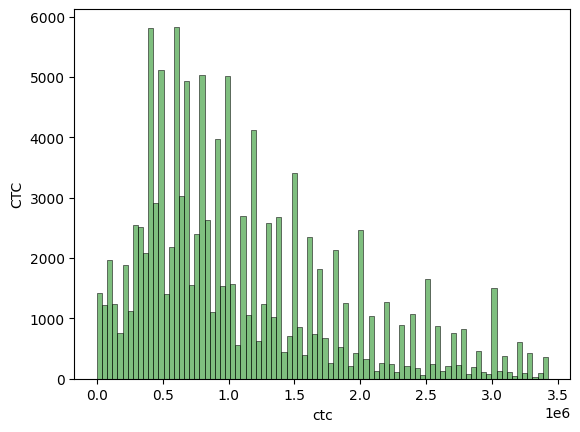

In [ ]:
sns.histplot(dftmp['ctc'], color='green', alpha=0.5)

plt.ylabel('CTC')
plt.show()

In [ ]:
print("Top 10 employees of data science in each company earning more than their peers (Class 1)")
print('----'*28)
top_class1[cols]

Top 10 employees of data science in each company earning more than their peers (Class 1)
----------------------------------------------------------------------------------------------------------------


,email_hash,company_hash,job_position,ctc,Years of Experience
0,eba7ff1100cfadb14ed1561978f736b0ba2dbb6268aff0...,1bs,Engineering Leadership,3400000,13
1,579d9c719cc05b885297256c122585a8f71871f9079c6f...,1bs,Backend Engineer,2930000,4
2,9c02076a74a2b8a64a6e003fa0a2e4115fc717dacb3585...,1bs,Backend Engineer,2320000,4
3,38dfe791fc911da418b67aa989a6aa7f00b8c680c6d4e1...,1bs,Backend Engineer,2000000,4
4,c97fd1612080086b898e440529c86325ae8ddf2e9a0b60...,1bs,Backend Engineer,1800000,4
...,...,...,...,...,...
13510,234f0f52e89b20231f5685551b865a08a5634189e1ffec...,zxztrtvuo,Backend Engineer,1500000,5
13511,748ebd12e4b5415465dea44130d057d8336b8753fa410f...,zxztrtvuo,Backend Engineer,1440000,2
13512,cd4c94fca170e120bb7a9b3f46cb8f903247a52016d6fa...,zxztrtvuo,Frontend Engineer,1200000,4
13513,077a6b1aa5195410e497d0fb91fe2627db85d9b9879ec7...,zxztrtvuo,FullStack Engineer,1200000,4


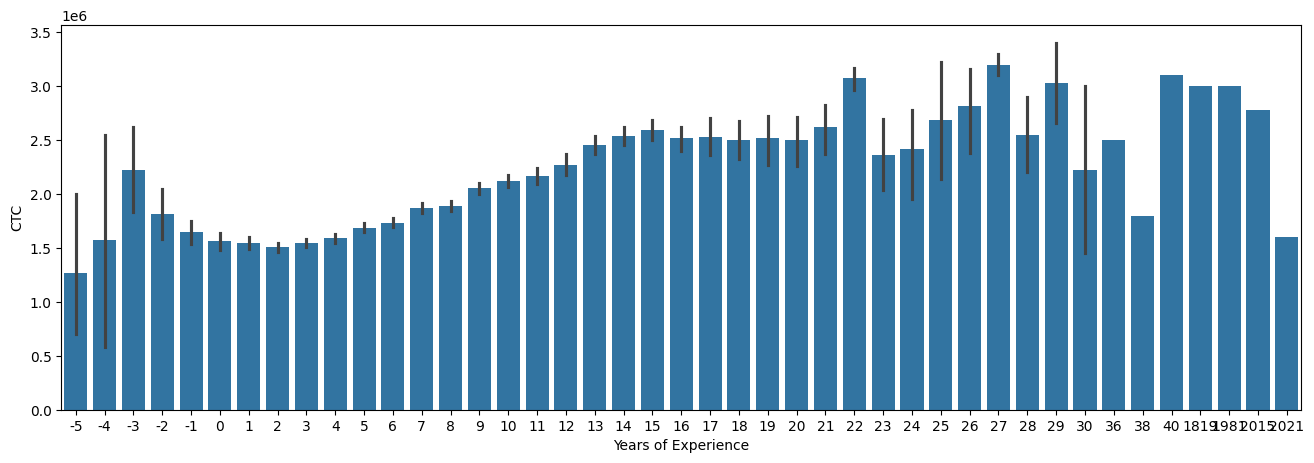

In [ ]:
plt.figure(figsize=(16,5))
sns.barplot(x=top_class1['Years of Experience'],y=top_class1['ctc'])
plt.ylabel('CTC')
plt.show()

* Most people in the top_class1 earns about 25LPA to 30LPA.

In [ ]:
print("Bottom 10 employees of data science in each company earning less than their peers (Class 3)")
print('----'*27)
bottom_class3[cols]

Bottom 10 employees of data science in each company earning less than their peers (Class 3)
------------------------------------------------------------------------------------------------------------


,email_hash,company_hash,job_position,ctc,Years of Experience
0,6eb6cb9918e8eceb347c37797a75e08f94c2050b857258...,1bs,Backend Engineer,700000,3
1,d0d06e9bb510f55e1e26e25cc8e1f6dfbe31384d3864a5...,1bs,Android Engineer,700000,2
2,9977fcf096a81795abeb0829760e399a0a7a727ebf8bbb...,1bs,SDET,700000,2
3,7c695fce8378386ea23a9ed3e70aa346c55989885db26a...,1bs,Frontend Engineer,750000,3
4,05896b9e35cad01ba3b06cfeff987bc11cea7dad009e00...,1bs,Frontend Engineer,800000,3
...,...,...,...,...,...
14412,d5b98d92628266c2037e78a367db956c140585fa027171...,zxztrtvuo,Backend Engineer,500000,2
14413,ea8082622619d930daedcb37053f8514d798d65b68f520...,zxztrtvuo,Engineering Intern,500000,0
14414,73ed57fdb578ccb723d176b1624bb29b0e840e89ab4230...,zxztrtvuo,Backend Engineer,520000,2
14415,1db0be9ceae007e64e983093f120de46d067ad09440165...,zxztrtvuo,Frontend Engineer,550000,2


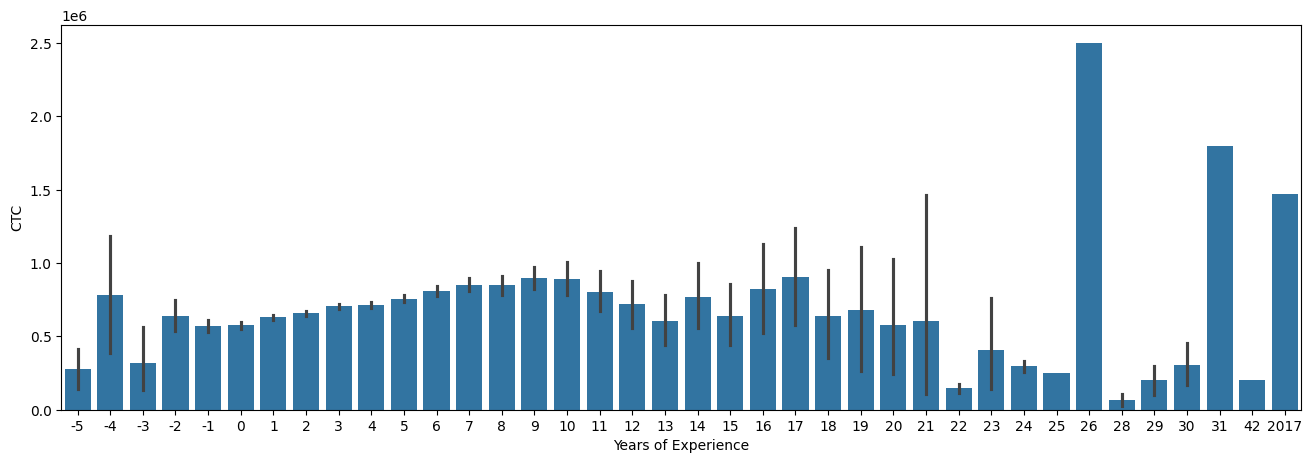

In [ ]:
plt.figure(figsize=(16,5))
sns.barplot(x=bottom_class3['Years of Experience'],y=bottom_class3['ctc'])
plt.ylabel('CTC')
plt.show()

* Most people in the bottom_class3 earns about 1LPA.

In [ ]:
print("Bottom 10 employees earning less than most of the employees in the company (Tier 3)")
print('----'*30)
bottom_tier3[cols]

Bottom 10 employees earning less than most of the employees in the company (Tier 3)
------------------------------------------------------------------------------------------------------------------------


,email_hash,company_hash,job_position,ctc,Years of Experience
63980,3505b02549ebe2c95840ac6f0a35561a3b4cbe4b79cdb1...,xzntqcxtfmxn,Backend Engineer,2,5
1248,80ba0259f9f59034c4927cf3bd38dc9ce2eb60ff18135b...,nvnv wgzohrnvzwj otqcxwto,Backend Engineer,600,5
3885,8625d6d072e12dad0c5748ab010e1d0315736a359e2bb5...,nvnv wgzohrnvzwj otqcxwto,Frontend Engineer,1000,8
4863,aaca628b0b240afc71c34e7d5922430dfd3742a4aa53a9...,sgrabvz ovwyo,Engineering Intern,1000,-1
22786,78eaccdfacf1b3d73037a6e86451d6424369c0d426feb4...,bgqsvz onvzrtj,Backend Engineer,1000,9
26602,b64eef23f6fc36f095565cba6180fde79ef7da7faf1f8b...,zvz,Backend Engineer,1000,8
26857,4ea8ce7809d8c69147d243bad53d88d016a1151690b8b6...,zvz,Engineering Leadership,1000,10
31709,299f764fcae62f331f3c5eb1b451e7107302ded46e2a71...,zgn vuurxwvmrt vwwghzn,Data Analyst,1000,14
35965,a7894c6d848de3021cfd16b35178cf8f48b10d77aa46dc...,bgngqgrv ogrhnxgzo,Android Engineer,1000,4
40168,5756870d895deca920251df2377dad261084904a4f9d10...,sggsrt,Co-founder,1000,47


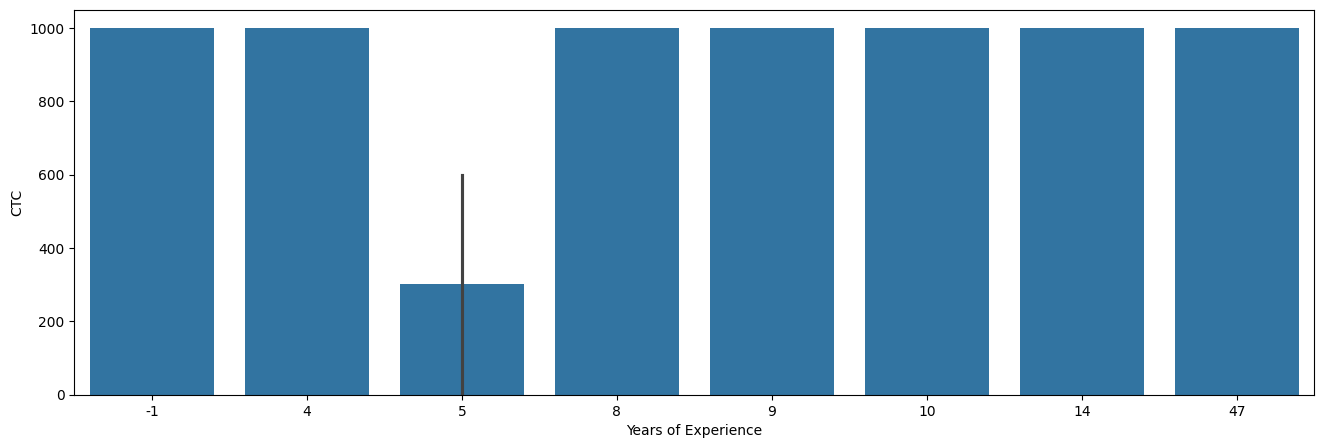

In [ ]:
plt.figure(figsize=(16,5))
sns.barplot(x=bottom_tier3['Years of Experience'],y=bottom_tier3['ctc'])
plt.ylabel('CTC')
plt.show()

In [ ]:
print("Top 10 employees in each company - X department - having 5/6/7 years of experience earning more than their peers (Tier X)")
print('----'*29)
top_tierX[cols]

Top 10 employees in each company - X department - having 5/6/7 years of experience earning more than their peers (Tier X)
--------------------------------------------------------------------------------------------------------------------


,email_hash,company_hash,job_position,ctc,Years of Experience
0,819789ff4068fd5c8facf8a5074cdd2e1ff989c95ae02c...,01 ojztqsj,Android Engineer,270000,5
1,48a8c5ecfa89c41d497e6717488bc1083ef78b6a3f6f12...,1001 vuuo,Frontend Engineer,1650000,6
2,ca7ab721db6e55be81164f516dc5349269ffa8d1a07377...,103 onhaxgo ucn rna,Frontend Engineer,320000,7
3,dcd91bb9e9ed1d5b9dc8a5e0c5b9afdeb5cece13c99771...,10ev xzaxv ucn rna,Data Analyst,880000,5
4,72b92a965f071792a7744a8f18e0118424cef5119e54f3...,11ntwyoihvqt,Backend Engineer,360000,6
...,...,...,...,...,...
31930,5a4198876493ce2496cf7af27f6d810e63e4ebc758d47e...,zxztrtvuo,Frontend Engineer,700000,5
31931,077a6b1aa5195410e497d0fb91fe2627db85d9b9879ec7...,zxztrtvuo,FullStack Engineer,1200000,5
31932,650fd4e2b40bbc033df1c93c07f9b778ce8aa5d98e8292...,zxztrtvuo,FullStack Engineer,923000,5
31933,b5628c03989a151f60c89e726351817c3a62078e7c70de...,zxztrtvuo,FullStack Engineer,575000,5


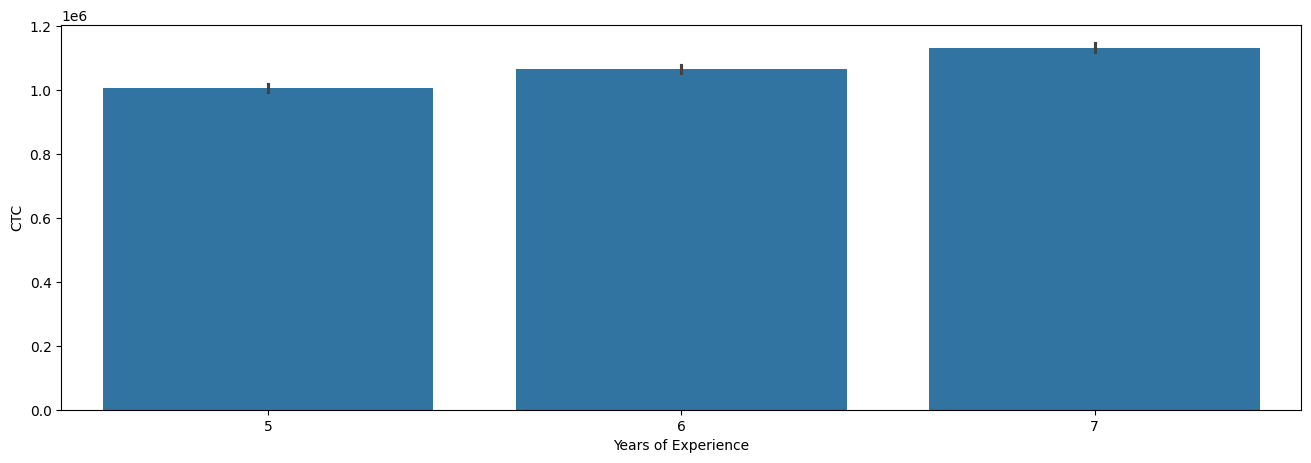

In [ ]:
plt.figure(figsize=(16,5))
sns.barplot(x=top_tierX['Years of Experience'],y=top_tierX['ctc'])
plt.ylabel('CTC')
plt.show()

In [ ]:
print("Top 10 companies based on their CTC")
print('--'*20)
top_companies

Top 10 companies based on their CTC
----------------------------------------


,company_hash,ctc
0,mvqwrvjo ntwyzgrgsj wtzntq,3420000.0
1,nvqstn wgqugqvnxgz ucn rna,3410000.0
2,st xzahonqxvr,3410000.0
3,bgzj uqxzno uqxcvnt rxbxnta,3400000.0
4,bgztj nvu ucn rna,3400000.0
5,bxwqgogen qa,3400000.0
6,grvb xzntqzvnxgzvr,3400000.0
7,gzmgvqaxej xzw,3400000.0
8,hzxojo srgmvr otqcxwto xzaxv rna,3400000.0
9,ktzntp bvontqo uqxcvnt rxbxnta,3400000.0


In [ ]:
print("Top 2 positions in every company based on their CTC")
print('--'*28)
top_positions

Top 2 positions in every company based on their CTC
--------------------------------------------------------


,company_hash,job_position,ctc
0,0,Other,100000.0
1,0000,Other,300000.0
2,01 ojztqsj,Frontend Engineer,830000.0
3,01 ojztqsj,Android Engineer,270000.0
4,05mz exzytvrny uqxcvnt rxbxnta,Backend Engineer,1100000.0
...,...,...,...
38561,zyuw rxbxnta,Frontend Engineer,2400000.0
38562,zyvzwt wgzohrnxzs tzsxzttqo,Frontend Engineer,940000.0
38563,zz,Other,1370000.0
38564,zzb ztdnstz vacxogqj ucn rna,FullStack Engineer,600000.0


#Building the ML Model for Clustering

##Preprocessing

In [ ]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['job_position'] = le.fit_transform(df['job_position'])
df['company_hash'] = le.fit_transform(df['company_hash'])
df['email_hash'] = le.fit_transform(df['email_hash'])
df = df.drop(columns=['Unnamed: 0'])
df.head(3)

,email_hash,company_hash,orgyear,ctc,job_position,ctc_updated_year,Years of Experience
0,0,3704,2012,3500000,108,2019,7
1,1,12041,2013,250000,108,2020,7
2,2,7556,2021,1300000,227,2019,-2


In [ ]:
#Standardization of data
from sklearn.preprocessing import StandardScaler
df_scaled = StandardScaler().fit_transform(df)

##Clustering

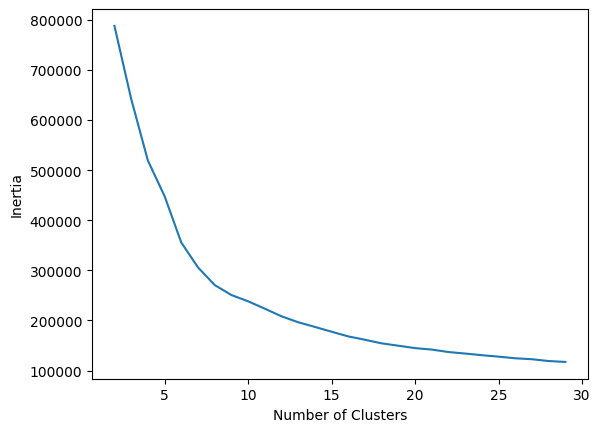

In [ ]:
#Elbow method
from sklearn.cluster import KMeans

elbow = []
for k in range(2,30):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(df_scaled[:, :-1])
  elbow.append(kmeans.inertia_)

plt.plot(range(2,30), elbow)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

It looks like the elbow is formed when **6 to 8** clusters were considered.

In [ ]:
#Elbow method
from sklearn.metrics import silhouette_score

elbow = []
for k in range(2,12):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(df_scaled[:, :-1])
  elbow.append(silhouette_score(df_scaled[:, :-1], kmeans.labels_))

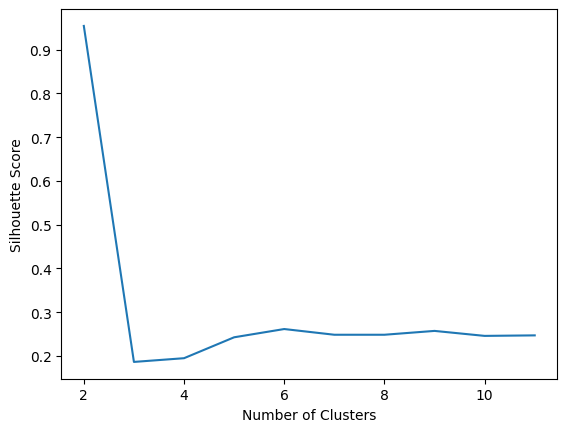

In [ ]:
plt.plot(range(2,12), elbow)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

It is confirmed from **inertia** and **silhouette_score** that **6** clusters should be formed.

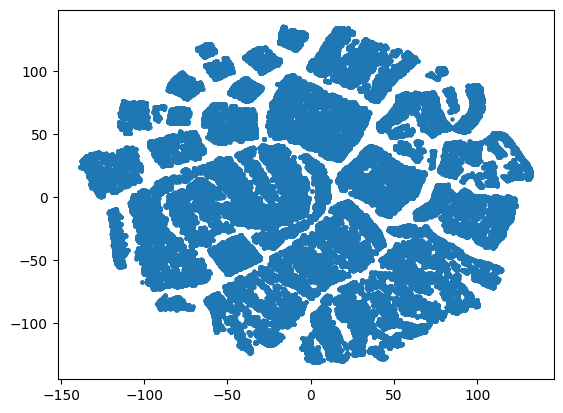

In [ ]:
#Using TSNE for dimensionality Reduction
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=50, random_state=42)
vis = tsne.fit_transform(df_scaled[:, :-1])

#Checking clustering tendency
plt.scatter(vis[:, 0], vis[:, 1], s=5)
plt.show()

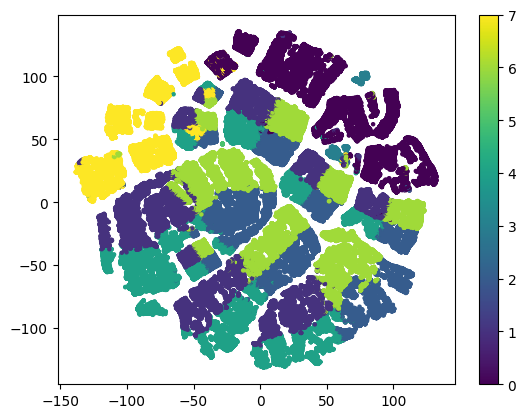

In [ ]:
#K-means clustering
kmeans = KMeans(n_clusters=8)
kmeans.fit(df_scaled[:, :-1])
plt.scatter(vis[:, 0], vis[:, 1], s=5, c=kmeans.labels_)
plt.colorbar()

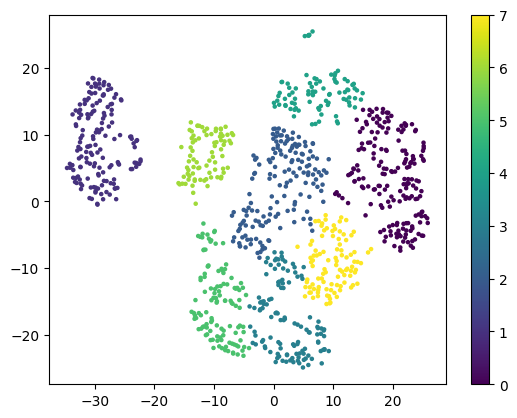

In [ ]:
#Hierarchical clustering
from sklearn.cluster import AgglomerativeClustering

sampled_df = pd.DataFrame(df_scaled).sample(n=1000, random_state=42)
vis = tsne.fit_transform(sampled_df)
hierar = AgglomerativeClustering(n_clusters=8, affinity='euclidean', linkage='ward').fit(vis)
plt.scatter(vis[:, 0], vis[:, 1], s=5, c=hierar.labels_)
plt.colorbar()

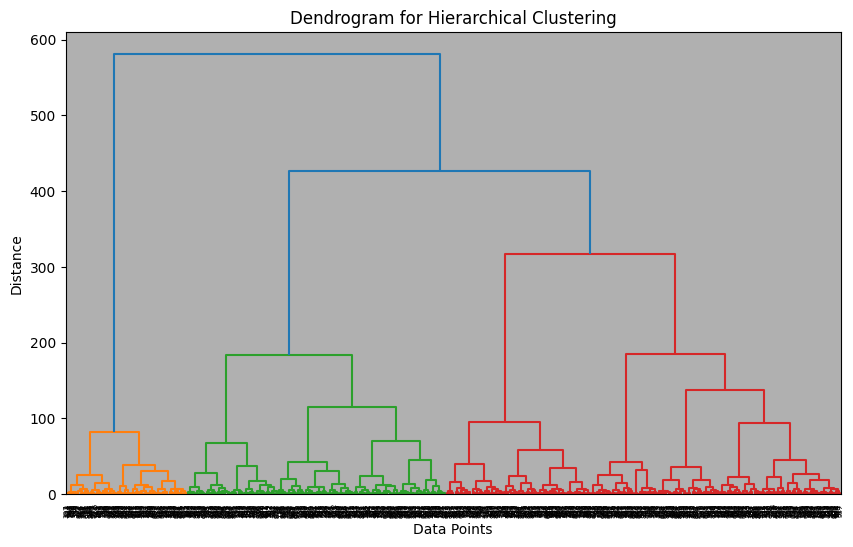

In [ ]:
#Dendogram
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

linkage_matrix = linkage(vis, method='ward')
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.grid(True)
plt.show()

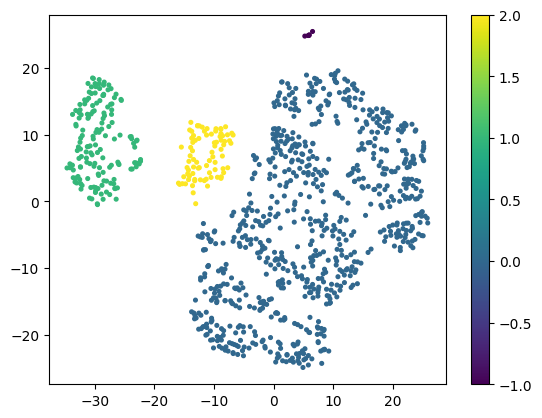

In [ ]:
#DBSCAN clustering

from sklearn.cluster import DBSCAN

dbsc = DBSCAN(eps = 5.5, min_samples = 45).fit(vis)
plt.scatter(vis[:,0], vis[:,1], s=7, c=dbsc.labels_)
plt.colorbar()
plt.show()

2% of our data is noise

#Insights & Recommendations

---
<font size='5'>Insights

1. Top Paying job titles include 'Engineering Leadership', 'Backend Engineer', 'Product Manager', 'Program Manager', 'SDET', 'QA Engineer', 'Data Scientist', 'Android Engineer' and 'FullStack Engineer'.

2. Among top paying companies, salary for these is getting lesser in recent years.

3. Avg CTC seems to be decreasing with year.

---


<font size='5'>Recommendations

1. Freshers who want to work on technical side should look for roles related to Backend Engineer, SDET, QA engineer, Data Scientist, Android Engineer,Full stack engineer to get good salaries as experience increases.